## List of all RV planets in the exoplanets archive less than 70pc retreived from online interface

In [1]:
import warnings
warnings.filterwarnings('ignore')
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
p = NasaExoplanetArchive.query_criteria(table="pscomppars", select="*", 
                                        where="sy_dist < 70 and discoverymethod = 'Radial Velocity'")
p = p.to_pandas()
p = p.sort_values(by=['sy_dist'])
p = p.reset_index(drop = True)
p.to_csv('PS_2025-02-25.csv', index=False)
print(len(p))

789


In [2]:
p

,objectid,pl_name,pl_letter,hostid,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,...,pl_angseperr1,pl_angseperr2,pl_angseplim,pl_angsepformat,pl_angsepstr,pl_angsepsymerr,pl_angsep_reflink,pl_ndispec,sky_coord.ra,sky_coord.dec
0,3.11922,Proxima Cen b,b,2.57278,Proxima Cen,,HIP 70890,TIC 388857263,2016-08,2016,...,NaN,NaN,0.0,,37.3,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,217.393466,-62.676182
1,3.19959,Barnard b,b,2.58355,Barnard's star,,HIP 87937,TIC 325554331,2024-10,2024,...,NaN,NaN,0.0,,12.6,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,269.448614,4.737981
2,3.10965,eps Eri b,b,2.54566,eps Eri,HD 22049,HIP 16537,TIC 118572803,2000-12,2000,...,NaN,NaN,0.0,,1.1e+03,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,53.228431,-9.458172
3,3.12547,GJ 887 b,b,2.61107,GJ 887,HD 217987,HIP 114046,TIC 155315739,2020-06,2020,...,NaN,NaN,0.0,,20.7,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,346.466827,-35.853069
4,3.12548,GJ 887 c,c,2.61107,GJ 887,HD 217987,HIP 114046,TIC 155315739,2020-06,2020,...,NaN,NaN,0.0,,36.5,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,346.466827,-35.853069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,3.19436,HIP 29442 d,d,2.573359,HD 42813,HD 42813,HIP 29442,TIC 33692729,2023-08,2023,...,NaN,NaN,0.0,,0.987,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,93.057845,-14.649317
785,3.11111,HD 143361 b,b,2.57680,HD 143361,HD 143361,HIP 78521,TIC 255480497,2009-03,2008,...,NaN,NaN,0.0,,29,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,240.458841,-44.435057
786,3.11169,HD 179079 b,b,2.58578,HD 179079,HD 179079,HIP 94256,TIC 48917782,2009-09,2008,...,NaN,NaN,0.0,,1.74,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,287.790373,-2.638770
787,3.11951,HD 72892 b,b,2.55686,HD 72892,HD 72892,HIP 42098,TIC 405344271,2017-04,2016,...,NaN,NaN,0.0,,3.27,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,128.719555,-14.457431


## If radius is missing
Use mass-radius relation and minimum mass to estimate radius.

In [3]:
def PlanetMass2Radius(M):
    ''' Theoretical mass-radius relation for planets and brown dwarfs by Jared
        taken from 
        https://jaredmales.github.io/mxlib-doc/group__planets.html#ga4b350ecfdeaca1bedb897db770b09789
    '''
    try:
        M = M.to(u.Mearth)
        M = M.value
    except:
        pass
    
    if M < 4.1:
        R = M**(1/3)
        
    if M >= 4.1 and M < 15.84:
        R = 0.62 * M**(0.67)
        
    if M >= 15.84 and M < 3591.1:
        coeff = [14.0211, -44.8414, 53.6554, -25.3289, 5.4920, -0.4586]
        power = [0, 1, 2, 3, 4, 5]
        R = 0
        for i in range(6):
            R += coeff[i] * (np.log10(M)**power[i])
            
    if M >= 3591.1:
        R = 32.03 * M**(-1/8)
        
    return R
    
p['M2R infered radius [Rearth]'] = np.nan
for i in range(len(p)):
    if np.isnan(p.loc[i]['pl_rade']):
        if not np.isnan(p.loc[i]['pl_bmasse']):
            p['M2R infered radius [Rearth]'][i] = PlanetMass2Radius(p.loc[i]['pl_bmasse'])
            

## SMA:
drop ones without sma 

In [4]:
ind = np.where(np.isnan(p['pl_orbsmax']))[0]
p = p.drop(ind)
p = p.reset_index(drop = True)

## Get Spectral Type/Teff if missing:

#### If there is no SpT, use Teff to estimate.  If there is no Teff, use SpT to estimate.  Using the Mamjek table
https://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt

In [6]:
# put spectral types into numeric scheme X.YY where X is a number corresponding to letter type with 0 == O and 6 ==M,
# and .YY is the number converted to decimal.

def GetSpTNumber(j):
    sptletters = ['O','B','A','F','G','K','M','L','T','Y']
    sptnumbers = [0,1,2,3,4,5,6,7,8,9]
    ind = np.where([x['SpT'][j][0]==sptletters[i] for i in range(len(sptletters))])
    n = sptnumbers[ind[0][0]]
    n += float(x['SpT'][j][1])/10
    if '.' in x['SpT'][j]:
        n += 0.05
    return n

# Convert SpT to numbers to allow for interpolation:
x = pd.read_table('EEM_dwarf_UBVIJHK_colors_Teff.txt', delim_whitespace=True, comment='#',
                 nrows=118)
x['SpT Numbers'] = np.nan
for j in range(len(x)):
    x['SpT Numbers'][j] = GetSpTNumber(j)


In [7]:
# Create SpT/Teff lookup splines:
from scipy.interpolate import UnivariateSpline
GetTeffSpl = UnivariateSpline(x['SpT Numbers'], x['Teff'])
GetSpTSpl = UnivariateSpline(x['Teff'][::-1],x['SpT Numbers'][::-1])

In [8]:
# Now turn star SpT into numbers:
def GetSpTNumber(j):
    sptletters = ['O','B','A','F','G','K','M','L','T','Y']
    sptnumbers = [0,1,2,3,4,5,6,7,8,9]
    ind = np.where([p['st_spectype'][j][0]==sptletters[i] for i in range(len(sptletters))])
    try:
        n = sptnumbers[ind[0][0]]
    except IndexError:
        pass
    try:
        n += float(p['st_spectype'][j][1])/10
        if '.5' in p['st_spectype'][j]:
            n += 0.05
        return n
    except:
        pass


p['SpT Number'] = np.nan
for j in range(len(p)):
    if p['st_spectype'][j] == '':
        pass
    else:
        p['SpT Number'][j] = GetSpTNumber(j)

#### If there's no SpT infer it from Teff table:

In [9]:
p['Inferred SpT from Teff'] = np.nan
ind = np.where(np.isnan(p['SpT Number']))[0]

for i in ind:
    #print(i,p['SpT Number'][i],p['st_teff'][i])
    p['Inferred SpT from Teff'][i] = GetSpTSpl(p['st_teff'][i])  
    #print(p['Inferred SpT from Teff'][i])
    
ind = np.where(np.isnan(p['SpT Number']))[0]
for i in ind:
    p['SpT Number'][i] = p['Inferred SpT from Teff'][i]
print(np.where(np.isnan(p['SpT Number']))[0])

[]


#### If no Teff infer it from SpT table:

In [10]:
p['Inferred Teff from SpT'] = np.nan
p['StarTeff'] = p['st_teff']

ind = np.where(np.isnan(p['st_teff']))

for i in ind:
    p['Inferred Teff from SpT'][i] = GetTeffSpl(p['SpT Number'][i])  
    p['StarTeff'][i] = GetTeffSpl(p['SpT Number'][i]) 

### Compile radius:

In [11]:
p['PlanetRadiuse'] = p['pl_rade'].copy()
ind = np.where(np.isnan(p['pl_rade']))[0]
p['PlanetRadiuse'][ind] = p['M2R infered radius [Rearth]'][ind]
np.where(np.isnan(p['PlanetRadiuse']))

(array([], dtype=int64),)

## Star properties

#### If missing radius get from Mamjek table using Teff:

In [12]:
x = pd.read_table('EEM_dwarf_UBVIJHK_colors_Teff.txt', delim_whitespace=True, comment='#',
                 nrows=118)

for i in range(len(x)):
    if x['R_Rsun'][i] == '...':
        x['R_Rsun'][i] = np.nan
    x['R_Rsun'][i] = float(x['R_Rsun'][i])

from scipy.interpolate import UnivariateSpline
GetStarRadSpl = UnivariateSpline(x['Teff'][:110][::-1], x['R_Rsun'][:110][::-1])


In [13]:
p['StarRad'] = p['st_rad'].copy()

p['Inferred StarRad from Teff'] = np.nan
ind = np.where(np.isnan(p['st_rad']))[0]
for i in ind:
    p['Inferred StarRad from Teff'][i] = GetStarRadSpl(p['StarTeff'][i])
    p['StarRad'][i] = GetStarRadSpl(p['StarTeff'][i])

In [14]:
p.to_csv('Refl-light-target-list.csv',index=False)

# Compute typical/maximum separation

In [16]:
orbits = p[['pl_name','pl_orbsmax','pl_orbper','pl_orbincl','pl_orbeccen','pl_bmasse','pl_bmassj','st_mass', 
             'sy_dist', 'PlanetRadiuse', 'pl_orblper','StarTeff', 'st_logg', 'st_met', 'StarRad','sy_imag',
            'sy_gaiamag','rastr','ra','decstr','dec','SpT Number']]

## Drop planets missing necessary information:

In [17]:
print('Missing sma:',np.where(np.isnan(orbits['pl_orbsmax']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbsmax']))[0])
orbits = orbits.reset_index(drop=True)
print('Missing star mass:',np.where(np.isnan(orbits['st_mass']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['st_mass']))[0])
orbits = orbits.reset_index(drop=True)
print('Missing period:',np.where(np.isnan(orbits['pl_orbper']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbper']))[0])
orbits = orbits.reset_index(drop=True)
print('Missing eccen:',np.where(np.isnan(orbits['pl_orbeccen']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbeccen']))[0])
orbits = orbits.reset_index(drop=True)
print('Missing argp:',np.where(np.isnan(orbits['pl_orblper']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orblper']))[0])
orbits = orbits.reset_index(drop=True)

Missing sma: []
Missing star mass: []
Missing period: []
Missing eccen: [  4  34  35  65  72  78  87  88  92  97 121 144 178 179 252 765 766]
Missing argp: [  1   3   4  22  36  37  44  45  49  50 120 139 191 196 203 204 207 224
 226 247 248 249 250 285 286 302 303 304 317 327 328 332 333 334 427 451
 453 513 514 526 556 561 562 574 634 640 717 718 719 720]


## Computing contrast and phase:

From Cahoy 2010 Eqn 1:

$$ C(\alpha) = A_g(\lambda) \left(\frac{R_p}{r}\right)^2 \left[\frac{\sin\alpha + (\pi - \alpha)\cos\alpha}{\pi} \right]$$
where<br>
$C(\alpha)$ is planet-star contrast<br>
$ A_g(\lambda)$ is geometric albedo<br>
$R_p$ is planet radius<br>
$r$ is planet-star true separation (in the orbit plane)<br>

And phase as a function of orbital elements is given by:<br>

$$\alpha = \cos^{-1} \left(\sin(i) \;\times\; \sin(\theta + \omega_p)\right)$$
where<br>
$\omega_p$ is argument of periastron<br>
$i$ is inclination, with i=90 being edge on and i = 0,180 being face on<br>
$\theta$ is the true anomaly with
$$\theta = 2 \tan^{-1} \left(\sqrt{\frac{1+e}{1-e}} \tan(E/2) \right)$$
where<br>
$e$ is the eccentricity<br>
$E$ is the eccentricity anomaly<br>
with
$$M = E - e \sin E$$
$$M = 2\pi \frac{\Delta t}{P}$$
where<br>
$M$ is the mean anomaly<br>
$\Delta t$ is the time since periastron passage<br>
$P$ is the orbital period
<br><br>

In [41]:
def eccentricity_anomaly(E,e,M):
    '''Eccentric anomaly function'''
    import numpy as np
    return E - (e*np.sin(E)) - M

def danby_solve(f, M0, e, h, maxnum=50):
    ''' Newton-Raphson solver for eccentricity anomaly based on "Danby" method in 
        Wisdom textbook
    Inputs: 
        f (function): function to solve (transcendental ecc. anomaly function)
        M0 (float): mean anomaly
        e (float): eccentricity
        h (float): termination criteria for solver
        maxnum (int): if it takes more than maxnum iterations,
            use the Mikkola solver instead.
    Returns: nextE (float): converged solution for eccentric anomaly
        Written by Logan Pearce, 2020
    '''
    import numpy as np
    from myastrotools.tools import eccentricity_anomaly
    #f = eccentricity_anomaly
    k = 0.85
    E0 = M0 + np.sign(np.sin(M0))*k*e
    lastE = E0
    nextE = lastE + 10* h 
    number=0
    delta_D = 1
    while (delta_D > h) and number < maxnum+1: 
        fx = f(nextE,e,M0) 
        fp = (1.-e*np.cos(lastE)) 
        fpp = e*np.sin(lastE)
        fppp = e*np.cos(lastE)
        lastE = nextE
        delta_N = -fx / fp
        delta_H = -fx / (fp + 0.5*fpp*delta_N)
        delta_D = -fx / (fp + 0.5*fpp*delta_H + (1./6)*fppp*delta_H**2)
        nextE = lastE + delta_D
        number=number+1
        if number >= maxnum:
            from myastrotools.tools import mikkola_solve
            nextE = mikkola_solve(M0,e)
    return nextE

def ComputeFluxRatio(Rp, sep_in_orbit_plane, alpha, Ag = 0.5):
    ''' For a single planet compute planet/star flux ratio using Cahoy 2010 eqn 1
    and https://ui.adsabs.harvard.edu/abs/2017ApJ...844...89C/abstract
    
    Args:
        Rp (astropy units object): planet radius
        sep (astropy units object): planet-star separation in the plane of the orbit (true separation)
        alpha (flt): phase angle in degrees
        Ag (flt): geometric albedo

    Returns:
        flt: planet-star contrast
    '''
    alpha = np.radians(alpha)
    angleterm = (np.sin(alpha) + (np.pi - alpha)*np.cos(alpha)) / np.pi
    Rp = Rp.to(u.km)
    sep_in_orbit_plane = sep_in_orbit_plane.to(u.km)
    C = Ag * ((Rp / sep_in_orbit_plane)**2) * angleterm
    return C


def GetPhaseAngle(MeanAnom, ecc, inc, argp):
    ''' Function for returning observed phase angle given orbital elements
    Args:
        MeanAnom (flt): Mean anomly in radians, where MeanAnom = orbit fraction*2pi, or M=2pi * time/Period
        ecc (flt): eccentricity, defined on [0,1)
        inc (flt): inclination in degrees, where inc = 90 is edge on, inc = 0 or 180 is face on orbit
        argp (flt): argument of periastron in degrees, defined on [0,360)
        
    Returns:
        flt: phase angle in degrees
    Written by Logan Pearce, 2023
    '''
    import numpy as np
    inc = np.radians(inc)
    argp = np.radians(argp)
    EccAnom = danby_solve(eccentricity_anomaly, MeanAnom, ecc, 0.001, maxnum=50)
    TrueAnom = 2*np.arctan( np.sqrt( (1+ecc)/(1-ecc) ) * np.tan(EccAnom/2) )
    Alpha = np.arccos( np.sin(inc) * np.sin(TrueAnom + argp) )
    return np.degrees(Alpha)

## Function for computing sepatation, contrast, and phase along a keplerian orbit

In [42]:
from projecc import KeplerianToCartesian, KeplersConstant, DanbySolve, EccentricityAnomaly

def GetOrbitPlaneOfSky(sma,ecc,inc,argp,lon,meananom,kep):
    ''' For a value fo sma, ecc, inc, argp, lan, and mass, compute the position in the sky plane for one or
    an array of mean anomaly values past periastron.

    args:
        sma [astropy unit object]: semi-major axis in au
        ecc [flt]: eccentricity
        inc [flt]: inclination in degrees
        argp [flt]: argument of periastron in degrees
        lon [flt]: longitude of nodes in degrees
        meananom [flt or arr]: a single value or array of values for the mean anomaly in radians at which 
            to compute positions
        kep [astropy unit object]: value of Kepler's constant for the system
    
    returns:
        flt or arr: X value of position, where +x corresponds to +Declination
        flt or arr: Y value, where +Y corresponds to +Right Ascension
        flt or arr: Z value, where +Z corresponds to towards the observer
    '''
    pos, vel, acc = KeplerianToCartesian(sma,ecc,inc,argp,lon,meananom,kep)
    return pos[0].value, pos[1].value, pos[2].value

def GetOrbitPlaneOfOrbit(sma,ecc,meananom,kep):
    ''' For a value fo sma, ecc, and mass, compute the position in the orbit plane for one or
    an array of mean anomaly values past periastron.

    args:
        sma [astropy unit object]: semi-major axis in au
        ecc [flt]: eccentricity
        meananom [flt or arr]: a single value or array of values for the mean anomaly in radians at which 
            to compute positions
        kep [astropy unit object]: value of Kepler's constant for the system
    
    returns:
        flt or arr: x value of position, where +x corresponds to semi-major axis towards periastron
        flt or arr: y value, where +y corresponds to semi-minor axis counterclockwise perpendiculat to +x
        flt or arr: z value, where +z corresponds to angular momentum vector for right handed system
    '''
    import numpy as np
    import astropy.units as u
    E = DanbySolve(EccentricityAnomaly, meananom, ecc, 0.001)
    return (sma*(np.cos(E) - ecc)).value, (sma*np.sqrt(1-ecc**2)*np.sin(E)).value, 0

def ComputeThings(M1, M2, sma, ecc, inc, argp, lon, Rp, Ag=0.3):
    # compute kepler's constant:
    kep = KeplersConstant(M1,M2)
    # empt arrays to store things:
    xs = []
    ys = []
    zs = []
    truexs = []
    trueys = []
    truezs = []
    alphas = []
    n=500
    # array of mean anomalies for each point on the orbit:
    meananom = np.linspace(0,2*np.pi,n)
    # for each point:
    for j in range(len(meananom)):
        # get x,y,z postion in plane of orbit and plane of sky
        pos_planeofsky = GetOrbitPlaneOfSky(sma,ecc,inc,argp,lon,meananom[j],kep)
        pos_planeoforbit = GetOrbitPlaneOfOrbit(sma,ecc,meananom[j],kep)

        xs.append(pos_planeofsky[0])
        ys.append(pos_planeofsky[1])
        zs.append(pos_planeofsky[2])
        truexs.append(pos_planeoforbit[0])
        trueys.append(pos_planeoforbit[1])
        truezs.append(pos_planeoforbit[2])
        # compute phase at that point:
        alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)
        alphas.append(alpha)

    # turn into arrays for mathing:
    xs = np.array(xs)
    ys = np.array(ys)
    zs = np.array(zs)
    truexs = np.array(truexs)
    trueys = np.array(trueys)
    truezs = np.array(truezs)
    alphas = np.array(alphas)

    # get separation in plane of orbit and sky at each orbit point:
    sep_planeoforbit = np.sqrt(truexs**2 + trueys**2)
    sep_planeofsky = np.sqrt(xs**2 + ys**2)
    # get contrasts at each orbit point:
    contrasts = np.array([ComputeFluxRatio(Rp, sep_planeoforbit[i]*u.au, alphas[i], Ag = Ag) for i in range(len(alphas))])
    
    return xs, ys, zs, truexs, trueys, truezs, sep_planeoforbit, sep_planeofsky, alphas, contrasts



In [43]:
### Compite phase and contrast at max projected separation:b

from projecc import update_progress
maxprojseps = []
phases = []
conts = []
seps_planeofsky = []
seps_planeoforbit = []
allconts = []
allphases = []

for i in range(len(orbits)):
    # for each planet:
    p = orbits.loc[i]
    # get the stuff:
    M1 = p['st_mass'].item()*u.Msun
    M2 = p['pl_bmasse'].item()*u.Mearth
    sma = p['pl_orbsmax'].item()*u.au
    ecc = p['pl_orbeccen'].item()
    inc = p['pl_orbincl'].item() # deg
    if np.isnan(inc):
        inc = 60
    argp = p['pl_orblper'].item() # deg
    ### Assuming argp refers to the star, appliy 180 deg offset for planet argp:
    argp = (argp + 180) % 360
    lon = 0
    Rp = p['PlanetRadiuse'].item()*u.Rearth
    # compute the things
    xs, ys, zs, truexs, trueys, truezs, sep_planeoforbit, sep_planeofsky, alphas, contrasts = ComputeThings(M1,M2,sma,ecc,inc,argp,lon,Rp,Ag=0.3)
    # find the max projected separation and it's index:
    maxprojsep = np.max(sep_planeofsky)
    maxprojsepind = np.where(sep_planeofsky == maxprojsep)[0]
    # record the results:
    maxprojseps.append(sep_planeofsky[maxprojsepind])
    phases.append(alphas[maxprojsepind])
    conts.append(contrasts[maxprojsepind])
    seps_planeofsky.append(sep_planeofsky)
    seps_planeoforbit.append(sep_planeoforbit)
    allconts.append(contrasts)
    allphases.append(alphas)
    update_progress(i,len(orbits))
    
phases = np.array([phases[i][0] for i in range(len(phases))])
conts = np.array([conts[i][0] for i in range(len(conts))])
maxprojseps = np.array([maxprojseps[i][0] for i in range(len(maxprojseps))])

100.0% (703 of 704): |####################|  

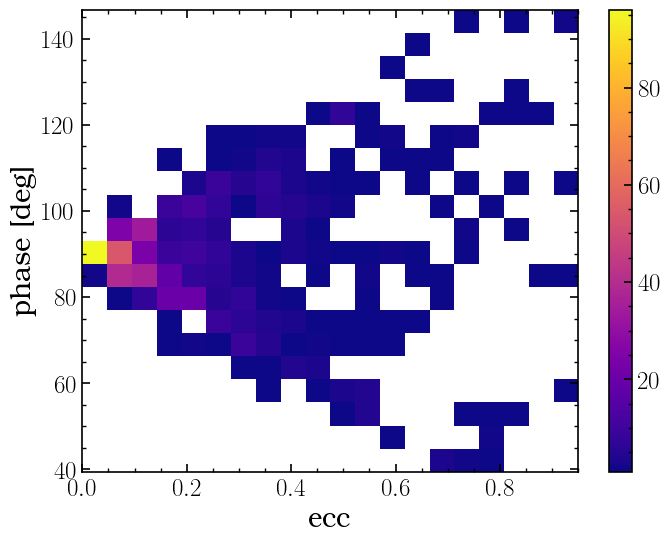

In [44]:
orbits['MaxProjectedSeparation_au'] = maxprojseps
orbits['MaxProjectedSeparation_mas'] = (orbits['MaxProjectedSeparation_au']/orbits['sy_dist'])*1000
orbits['PhaseAtMaxProj'] = phases
orbits['ContrastAtMaxProj'] = conts

# Check to make sure there is a correlation between eccentricity and phase
%matplotlib inline
plt.hist2d(orbits['pl_orbeccen'],orbits['PhaseAtMaxProj'],bins=20,cmin=1)
plt.colorbar()
plt.xlabel('ecc')
plt.ylabel('phase [deg]')
plt.show()

In [45]:
lod_elt = (0.2063 * 0.8 / 39) * 1000
lod_gmagaox = (0.2063 * 0.8 / 25.4) * 1000
lod_magaox = (0.2063 * 0.8 / 6.5) * 1000
orbits['MaxProjectedSeparation_lod_elt'] = orbits['MaxProjectedSeparation_mas']/lod_elt
orbits['MaxProjectedSeparation_lod_gmagaox'] = orbits['MaxProjectedSeparation_mas']/lod_gmagaox
orbits['MaxProjectedSeparation_lod_magaox'] = orbits['MaxProjectedSeparation_mas']/lod_magaox

In [46]:
### Save the whole orbit points in the db as well for good measure:
import warnings
warnings.filterwarnings('ignore')
orbits['SepsInPlaneOfSky_au'] = pd.Series(np.nan, dtype='object')
orbits['SepsInPlaneOfOrbit_au'] = pd.Series(np.nan, dtype='object')
orbits['Contrasts'] = pd.Series(np.nan, dtype='object')
orbits['Phases'] = pd.Series(np.nan, dtype='object')
for i in range(len(orbits)):
    orbits['SepsInPlaneOfSky_au'][i] = seps_planeofsky[i]
    orbits['SepsInPlaneOfOrbit_au'][i] = seps_planeoforbit[i]
    orbits['Contrasts'][i] = allconts[i]
    orbits['Phases'][i] = allphases[i]

orbits['SepsInPlaneOfSky_mas'] = pd.Series(np.nan, dtype='object')
orbits['SepsInPlaneOfSky_lod_magaox'] = pd.Series(np.nan, dtype='object')
orbits['SepsInPlaneOfSky_lod_gmagaox'] = pd.Series(np.nan, dtype='object')
orbits['SepsInPlaneOfSky_lod_elt'] = pd.Series(np.nan, dtype='object')
for i in range(len(orbits)):
    orbits['SepsInPlaneOfSky_mas'][i] = (orbits['SepsInPlaneOfSky_au'][i]/orbits['sy_dist'][i])*1000
    orbits['SepsInPlaneOfSky_lod_magaox'][i] = orbits['SepsInPlaneOfSky_mas'][i]/lod_magaox
    orbits['SepsInPlaneOfSky_lod_gmagaox'][i] = orbits['SepsInPlaneOfSky_mas'][i]/lod_gmagaox
    orbits['SepsInPlaneOfSky_lod_elt'][i] = orbits['SepsInPlaneOfSky_mas'][i]/lod_elt

In [47]:
orbits.to_csv('Target-list-with-orbital-params.csv', index=False)

## "Typical" sep/cont:
A weighted average of the orbital separation weigthed by contrast.

### Weights:
$$S/N \propto Cp$$

"Typical" = contrast weighted average

For all points of orbit outside IWA:

In [48]:
# pick a planet:
i = 2

iwa = np.where(orbits['SepsInPlaneOfSky_lod_gmagaox'][i] > 2)
seps = orbits['SepsInPlaneOfSky_lod_gmagaox'][i][iwa]
conts = orbits['Contrasts'][i][iwa]
phases = orbits['Phases'][i][iwa]

typical_sep_contsq = np.sum(seps*(conts**2))/np.sum((conts**2))
typical_cont = np.sum(conts*(conts**2))/np.sum((conts**2))
typical_phase = np.sum(phases*(conts**2))/np.sum((conts**2))

typical_sep_contsq

2.5978759809146865

Text(0, 0.5, 'Phase [deg]')

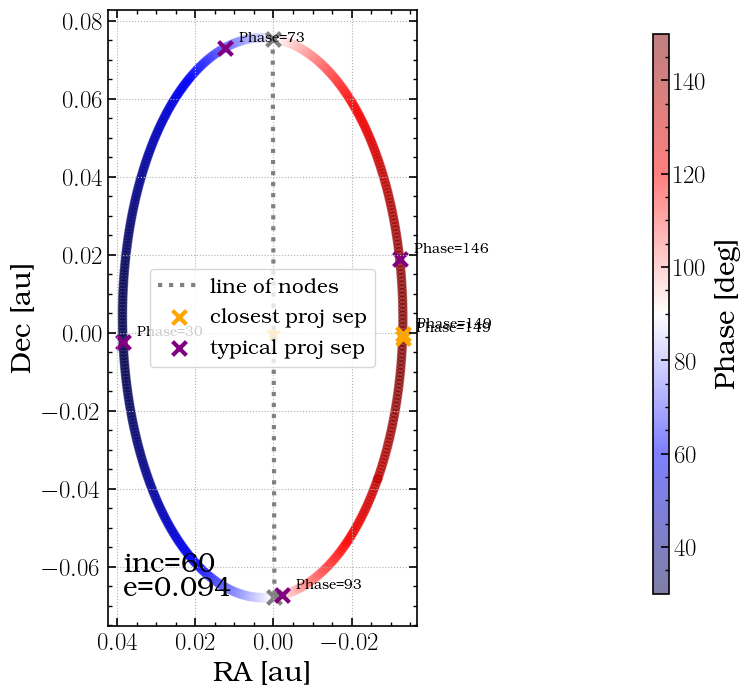

In [49]:
### Examples of typical separation:

p = orbits.loc[i]
# get the stuff:
M1 = p['st_mass'].item()*u.Msun
M2 = p['pl_bmasse'].item()*u.Mearth
sma = p['pl_orbsmax'].item()*u.au
ecc = p['pl_orbeccen'].item()
inc = p['pl_orbincl'].item() # deg
if np.isnan(inc):
    inc = 60
argp = p['pl_orblper'].item() # deg
argp = (argp + 180) % 360
lon = 0
Rp = p['PlanetRadiuse'].item()*u.Rearth
xs, ys, zs, truexs, trueys, truezs, sep_planeoforbit, sep_planeofsky, alphas, contrasts = ComputeThings(M1,M2,sma,ecc,inc,argp,lon,Rp,Ag=0.3)

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
ps = ax.scatter(ys,xs, c=alphas, cmap="seismic", alpha=0.5)

nodes_idx = np.where(np.sign(zs[:-1]) != np.sign(zs[1:]))[0] + 1
ax.scatter(ys[nodes_idx],xs[nodes_idx], marker='x',color='grey', s=100)
ax.plot(ys[nodes_idx],xs[nodes_idx], color='grey', ls=':', label='line of nodes')

sortseps = np.argsort(orbits['SepsInPlaneOfSky_lod_gmagaox'][i])
ax.scatter(ys[sortseps[:2]],xs[sortseps[:2]], marker='x',color='orange', s=100, label='closest proj sep')
string = [int(orbits['Phases'][i][sortseps[:2]][j]) for j in range(2)]
for j in range(2):
    ax.annotate('Phase='+str(string[j]),xy = (ys[sortseps[j]],xs[sortseps[j]]),
           xytext = (10,5), textcoords='offset points')
    
    
isclose = np.where(np.isclose(typical_sep_contsq,orbits['SepsInPlaneOfSky_lod_gmagaox'][i],rtol=5e-03))[0]
isclose = [60,190,310,439]
ax.scatter(ys[isclose],xs[isclose], marker='x',color='purple', s=100, label='typical proj sep')
string2 = [int(orbits['Phases'][i][isclose][j]) for j in range(4)]
for j in range(4):
    ax.annotate('Phase='+str(string2[j]),xy = (ys[isclose[j]],xs[isclose[j]]),
           xytext = (10,5), textcoords='offset points')

ax.scatter(0,0,marker='*',color='orange',s=100)
ax.annotate('e='+str(ecc),xy = (0.05,0.05), fontsize= 20, xycoords='axes fraction')
ax.annotate('inc='+str(inc),xy = (0.05,0.09), fontsize= 20, xycoords='axes fraction')


ax.set_xlabel('RA [au]')
ax.set_ylabel('Dec [au]')
# ax.set_xlim(-0.08,0.08)
# ax.set_ylim(-0.08,0.08)
ax.invert_xaxis()
ax.set_aspect('equal')
ax.grid(ls=':')
ax.legend(fontsize=15)
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
fig.colorbar(ps, cax=cbar_ax)
cbar_ax.set_ylabel('Phase [deg]')
#plt.savefig('example-typical-sep-orbit.png')

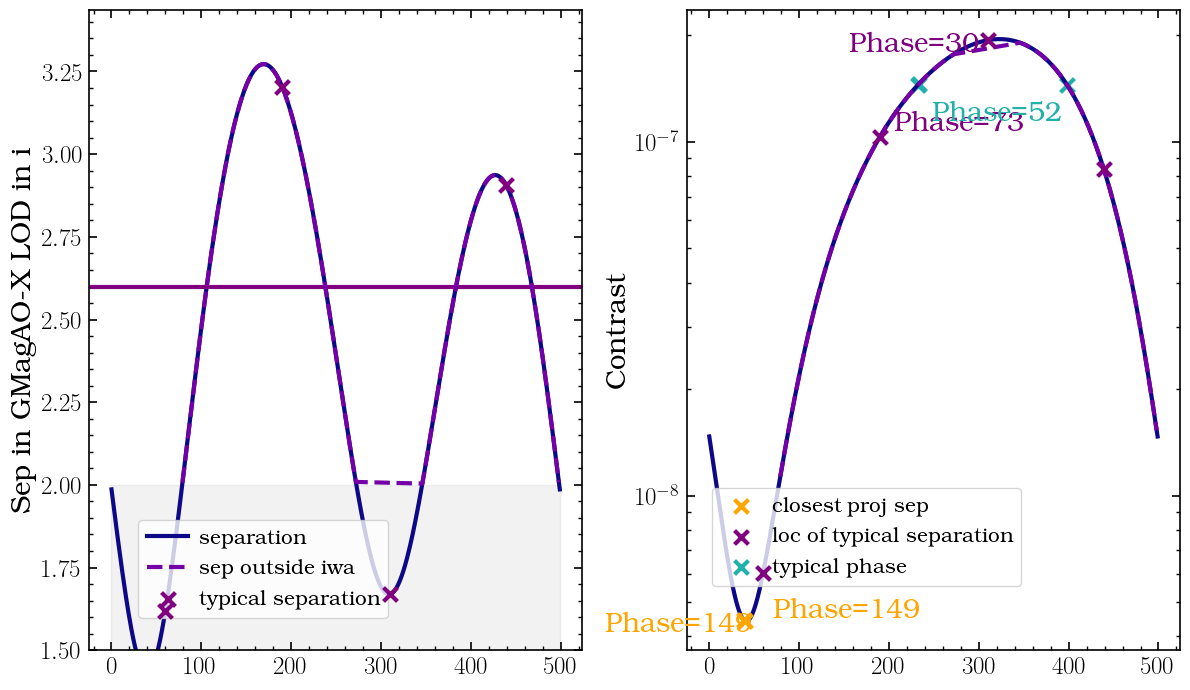

In [51]:
#i = np.where(orbits['pl_name'] == 'GJ 876 b')[0][0]

%matplotlib inline
plt.figure(figsize=(12,7))
plt.subplot(121)
plt.plot(range(500),orbits['SepsInPlaneOfSky_lod_gmagaox'][i], label='separation')
#plt.axhline(y=typical_sep_cont,color='orange')
plt.axhline(y=typical_sep_contsq,color='purple')
plt.plot(np.arange(0,500,1)[iwa],orbits['SepsInPlaneOfSky_lod_gmagaox'][i][iwa],ls='--',label='sep outside iwa')
plt.fill_between(range(500), 2, where=ys<=2, interpolate=True, color='grey', alpha = 0.1)


plt.scatter(isclose,orbits['SepsInPlaneOfSky_lod_gmagaox'][i][isclose], marker='x',color='purple', s=100, 
            label='typical separation',zorder=10)

plt.legend(loc=(0.1,0.05),fontsize=15)
plt.ylim(bottom=1.5)
plt.ylabel('Sep in GMagAO-X LOD in i')


plt.subplot(122)
plt.plot(range(500),orbits['Contrasts'][i])
#plt.axhline(y=typical_cont_cont,color='orange')
#plt.axhline(y=typical_cont_contsq,color='purple')
#plt.axhline(y=typical_cont2,color='grey', label='typical contrast')
plt.plot(np.arange(0,500,1)[iwa],orbits['Contrasts'][i][iwa],ls='--')
plt.scatter(sortseps[:2],orbits['Contrasts'][i][sortseps[:2]], marker='x',color='orange', s=100, 
            label='closest proj sep',zorder=10)

plt.scatter(isclose,orbits['Contrasts'][i][isclose], marker='x',color='purple', s=100, 
            zorder=10, label='loc of typical separation')

yoff = [-8,3]
xoff = [-100,20]
for j in range(2):
    plt.annotate('Phase='+str(string[j]),xy = (sortseps[j],orbits['Contrasts'][i][sortseps[j]]),
           xytext = (xoff[j],yoff[j]), textcoords='offset points', fontsize=20, color='orange')

yoff = [0,5,-8,0]
xoff = [0,10,-100,0]
for j in range(4):
    if j == 1 or j == 2:
        plt.annotate('Phase='+str(string2[j]),xy = (isclose[j],orbits['Contrasts'][i][isclose[j]]),
           xytext = (xoff[j],yoff[j]), textcoords='offset points', fontsize=20, color='purple')
        
phaseisclosetotypicalcont = np.where(np.isclose(typical_cont,orbits['Contrasts'][i],atol=1e-9))[0]

plt.scatter(phaseisclosetotypicalcont,orbits['Contrasts'][i][phaseisclosetotypicalcont],
           marker='x',color='lightseagreen',s=100, label='typical phase')
string3 = [int(orbits['Phases'][i][phaseisclosetotypicalcont][j]) for j in range(2)]
yoff = [-25,-20]
xoff = [10,20]
for j in range(1):
    plt.annotate('Phase='+str(string3[j]),xy = (phaseisclosetotypicalcont[j],
                                                orbits['Contrasts'][i][phaseisclosetotypicalcont[j]]),
           xytext = (xoff[j],yoff[j]), textcoords='offset points', fontsize=20, color='lightseagreen')


plt.ylabel('Contrast')
plt.gca().set_yscale('log')
plt.legend(loc=(0.05,0.1),fontsize=15)
plt.tight_layout()
#plt.savefig('example_typical_sep_cont.png')

In [53]:
lod_elt = (0.2063 * 0.8 / 39) * 1000
lod_gmagaox = (0.2063 * 0.8 / 25.4) * 1000
lod_magaox = (0.2063 * 0.8 / 6.5) * 1000

###### Do all and save in db:
TypicalSeparation_lod_gmagaox = []
TypicalSeparation_mas_gmagaox = []
TypicalSeparation_au_gmagaox = []
TypicalPhase_gmagaox = []
TypicalCont_gmagaox = []

TypicalSeparation_lod_magaox = []
TypicalSeparation_mas_magaox = []
TypicalSeparation_au_magaox = []
TypicalPhase_magaox = []
TypicalCont_magaox = []

TypicalSeparation_lod_elt = []
TypicalSeparation_mas_elt = []
TypicalSeparation_au_elt = []
TypicalPhase_elt = []
TypicalCont_elt = []

IWA = 0.5

for i in range(len(orbits)):
    iwa1 = np.where(orbits['SepsInPlaneOfSky_lod_gmagaox'][i] > IWA)
    seps = orbits['SepsInPlaneOfSky_lod_gmagaox'][i][iwa1]
    conts = orbits['Contrasts'][i][iwa1]
    phases = orbits['Phases'][i][iwa1]
    typical_sep = np.sum(seps*(conts**2))/np.sum((conts**2))
    typical_cont = np.sum(conts*(conts**2))/np.sum((conts**2))
    typical_phase = np.sum(phases*(conts**2))/np.sum((conts**2))
    TypicalSeparation_lod_gmagaox.append(typical_sep)
    TypicalPhase_gmagaox.append(typical_phase)
    TypicalCont_gmagaox.append(typical_cont)
    
    typical_sep_mas = typical_sep * lod_gmagaox
    TypicalSeparation_mas_gmagaox.append(typical_sep_mas)
    typical_sep_au = (typical_sep_mas/1000) * orbits['sy_dist'][i] 
    TypicalSeparation_au_gmagaox.append(typical_sep_au)
    
    iwa2 = np.where(orbits['SepsInPlaneOfSky_lod_magaox'][i] > IWA)
    seps = orbits['SepsInPlaneOfSky_lod_magaox'][i][iwa2]
    conts = orbits['Contrasts'][i][iwa2]
    phases = orbits['Phases'][i][iwa2]
    if conts.shape[0] == 0:
        typical_sep = np.nan
        typical_cont = np.nan
        typical_phase = np.nan
        typical_sep_mas = np.nan
        typical_sep_au = np.nan
    else:
        typical_sep = np.sum(seps*(conts**2))/np.sum((conts**2))
        typical_cont = np.sum(conts*(conts**2))/np.sum((conts**2))
        typical_phase = np.sum(phases*(conts**2))/np.sum((conts**2))
        typical_sep_mas = typical_sep * lod_magaox
        typical_sep_au = (typical_sep_mas/1000) * orbits['sy_dist'][i] 
        
    TypicalSeparation_lod_magaox.append(typical_sep)
    TypicalPhase_magaox.append(typical_phase)
    TypicalCont_magaox.append(typical_cont)
    TypicalSeparation_mas_magaox.append(typical_sep_mas)
    TypicalSeparation_au_magaox.append(typical_sep_au)

    iwa3 = np.where(orbits['SepsInPlaneOfSky_lod_elt'][i] > IWA)
    seps = orbits['SepsInPlaneOfSky_lod_elt'][i][iwa3]
    conts = orbits['Contrasts'][i][iwa3]
    phases = orbits['Phases'][i][iwa3]
    if conts.shape[0] == 0:
        typical_sep = np.nan
        typical_cont = np.nan
        typical_phase = np.nan
        typical_sep_mas = np.nan
        typical_sep_au = np.nan
    else:
        typical_sep = np.sum(seps*(conts**2))/np.sum((conts**2))
        typical_cont = np.sum(conts*(conts**2))/np.sum((conts**2))
        typical_phase = np.sum(phases*(conts**2))/np.sum((conts**2))
        typical_sep_mas = typical_sep * lod_elt
        typical_sep_au = (typical_sep_mas/1000) * orbits['sy_dist'][i] 
        
    TypicalSeparation_lod_elt.append(typical_sep)
    TypicalPhase_elt.append(typical_phase)
    TypicalCont_elt.append(typical_cont)
    TypicalSeparation_mas_elt.append(typical_sep_mas)
    TypicalSeparation_au_elt.append(typical_sep_au)
    

In [54]:
orbits['TypicalSeparation_lod_gmagaox'] = TypicalSeparation_lod_gmagaox
orbits['TypicalPhase_gmagaox'] = TypicalPhase_gmagaox
orbits['TypicalCont_gmagaox'] = TypicalCont_gmagaox

orbits['TypicalSeparation_lod_elt'] = TypicalSeparation_lod_elt
orbits['TypicalPhase_elt'] = TypicalPhase_elt
orbits['TypicalCont_elt'] = TypicalCont_elt

orbits['TypicalSeparation_lod_magaox'] = TypicalSeparation_lod_magaox
orbits['TypicalPhase_magaox'] = TypicalPhase_magaox
orbits['TypicalCont_magaox'] = TypicalCont_magaox

orbits['TypicalSeparation_mas_gmagaox'] = TypicalSeparation_mas_gmagaox
orbits['TypicalSeparation_au_gmagaox'] = TypicalSeparation_au_gmagaox

orbits['TypicalSeparation_mas_elt'] = TypicalSeparation_mas_elt
orbits['TypicalSeparation_au_elt'] = TypicalSeparation_au_elt

orbits['TypicalSeparation_mas_magaox'] = TypicalSeparation_mas_magaox
orbits['TypicalSeparation_au_magaox'] = TypicalSeparation_au_magaox

orbits.to_csv('Target-list-with-orbital-params.csv', index=False)

# Bokeh Interactive Plot

In [ ]:
######### This will work in  bokeh 2.4.3.


def GetPointsWithinARegion(xdata, ydata, points):
    ''' For a region defined by points, return the indicies of items from [xdata,ydata]
    that lie within that region
    
    Args:
        xdata, ydata (arr): x and y data 
        points (arr): array of points describing region in tuples of (x,y)
        
    Returns:
        indicies of points in dataframe that lie within the region.
    '''

    # find points that lie within region:
    stacked1 = np.stack((xdata,ydata),axis=1)
    from matplotlib import path
    pp = path.Path(points)
    indicieswithinregion = pp.contains_points(stacked1)
    return indicieswithinregion


def get_line_eq(x0, x1, y0, y1):
    return y0 - y1, x1 - x0, x0 * y1 - x1 * y0
    
def GetPointsAboveContrastCurve(x,y,cont_curve):
    aboves = []
    for i in range(len(cont_curve[0])-1):
        ar, br, cr = get_line_eq(cont_curve[0][i], cont_curve[0][i+1], cont_curve[1][i], cont_curve[1][i+1])
        above = (ar * x + br * y + cr >= 0) 
        xaboves.append(x[above])
        yaboves.append(y[above])
        aboves.append(above)
    
    aboves = np.array(aboves)
    above = np.empty(aboves.shape[1], dtype=bool)
    for i in range(aboves.shape[1]):
        above[i] = np.all(aboves[:,i])
    return above

def MakeInteractiveSeparationContrastPlotOfNearbyRVPlanets(orbits, plotx, ploty, phases, 
                                                           saveplot = True, 
                                                           sepau = None,
                                                           sepmas = None,
                                                           filt = 'None', xaxis_label = '',
                                                           annotation_text = '', IWA = 2,
                                                           ytop = 6e-6, ybottom = 2e-10,
                                                           xright = 20, xleft = 0,
                                                           ncolors = 10, ticklocs = 'None', ticklabels = 'None',
                                                          output_file_name = 'RVPlanetContrastPlot',
                                                          cont_curve = None):


    rad = orbits['PlanetRadiuse'].copy()
    spt = orbits['SpT Number'].copy()
    
    plotx, ploty = np.array(plotx),np.array(ploty)
    multiplier = 2
    datadf = pd.DataFrame(data={'plotx':plotx, 'ploty':ploty, 'color':spt, 'markersize':rad*multiplier,
                               'name':orbits['pl_name'], 'rad':rad, 'spt':spt, 'dist':orbits['sy_dist'],
                                'phases':phases, 'plotx_og':plotx, 'ploty_og':ploty, 'iwa': 2, 
                                'sepau':sepau, 'sepmas':sepmas, 'dec':orbits['dec'], 
                                'starteff':orbits['StarTeff'],
                                'masse':orbits['pl_bmasse']
                               })
    datadf = datadf.reset_index(drop=True)
    datadict = datadf.to_dict(orient = 'list')
    proxcendf = datadf.loc[np.where(datadf['name'] == 'Proxima Cen b')]
    proxcendict = proxcendf.to_dict(orient = 'list')

    from bokeh.plotting import figure, show, output_file, save
    from bokeh.io import output_notebook
    from bokeh.models import LinearColorMapper, ColumnDataSource, LinearInterpolator
    from bokeh.models import  Range1d, LabelSet, Label, ColorBar, FixedTicker, Span
    from bokeh.models import CustomJS, Slider
    from bokeh.layouts import column, row
    from bokeh.palettes import Magma256, Turbo256, brewer
    from bokeh.transform import linear_cmap
    #output_notebook()


    data=ColumnDataSource(data=datadict)
    proxima=ColumnDataSource(data=proxcendict)

    tools = "hover, box_zoom, zoom_in, zoom_out, save, undo, redo, reset, pan"
    tooltips = [
        ('Planet', '@name'),
        ('Cont', '@ploty'),
        ('Phase [deg]', '@phases{0}'),
        ("Sep [GmagAOX i' lod]", '@plotx{0.0}'),
        ('Sep [au]', '@sepau{0.00}'),
        ('Sep [mas]', '@sepmas{0.00}'),
        ('Rad [Rearth]','@rad{0.00}'),
        ('Mass or Msini [Mearth]','@masse{0.0}'),
        ('Star Teff', '@starteff{0}'),
        ('SpT','@spt{0.0}'),
        ('Dist [pc]','@dist{0.0}'),
        ('Decl', '@dec{0.0}')
    ]
    
    p = figure(width=900, height=750, y_axis_type="log", tools=tools, 
               tooltips=tooltips, toolbar_location="above")

    mapper = linear_cmap(field_name='phases', 
                         palette=brewer['RdBu'][ncolors],
                         low=20, high=150)
    
    p.scatter('plotx','ploty', source=data, fill_alpha=0.8, size='markersize', 
             line_color=mapper, color=mapper)
    
    p.scatter('plotx','ploty', source=proxima, fill_alpha=0.8, size='markersize', 
             line_color='red', color=mapper)

    if cont_curve is None:
        pass
    else:
        gmt_lod = (0.2063 * 0.8 / 24.5) * 1000
        cont_curve[0] = [cont_curve[0][i]/gmt_lod for i in range(len(cont_curve[0]))]
        cont_curve[0].append(max(data.data['plotx']))
        cont_curve[0].append(max(data.data['plotx']))
        cont_curve[0] = [cont_curve[0][0]] + cont_curve[0]
        cont_curve[0] = cont_curve[0] + [cont_curve[0][0]]
        cont_curve[1].append(cont_curve[1][len(cont_curve[1])-1])
        cont_curve[1].append(1e-4)
        cont_curve[1] = [1e-4]+cont_curve[1]
        cont_curve[1] = cont_curve[1] + [1e-4]
        cont_curve = np.array(cont_curve).T
        
        # gmt_lod = (0.2063 * 0.8 / 24.5) * 1000
        # cont_curve[0] = [cont_curve[0][i]/gmt_lod for i in range(len(cont_curve[0]))]
        # # extend all the way out:
        # cont_curve[0].append(max(plotx))
        # cont_curve[1].append(cont_curve[1][len(cont_curve[1])-1])
        # # extend up:
        # cont_curve[0] = [cont_curve[0][0]]+cont_curve[0]
        # cont_curve[1] = [1e-4]+cont_curve[1]
        # cont_curve = np.array(cont_curve)
        
        p.line(np.array(cont_curve[:,0]),cont_curve[:,1])
        #p.line(np.array(cont_curve[0]),cont_curve[1])
    
        #points = GetPointsAboveContrastCurve(plotx,ploty,cont_curve)
    
        points = GetPointsWithinARegion(data.data['plotx'], data.data['ploty'], cont_curve)
        datadfpoints = pd.DataFrame(data={'plotx':plotx[points], 'ploty':ploty[points], 'markersize':rad[points]*multiplier,
                                          'phases':phases[points], 'color':spt[points], 
                                   'name':orbits['pl_name'][points], 'rad':rad[points], 'spt':spt[points], 'dist':orbits['sy_dist'][points],
                                    'phases':phases[points], 'plotx_og':plotx[points], 'ploty_og':ploty[points], 'iwa': 2, 
                                    'sepau':sepau[points], 'sepmas':sepmas[points], 'dec':orbits['dec'][points], 
                                    'starteff':orbits['StarTeff'][points],
                                    'masse':orbits['pl_bmasse'][points]
                                   })
        datadfpoints = datadfpoints.reset_index(drop=True)
        datadfpointsdict = datadfpoints.to_dict(orient = 'list')
        datapoints=ColumnDataSource(data=datadfpointsdict)
        p.scatter('plotx','ploty', source=datapoints, fill_alpha=1, size='markersize', 
                 line_color='black', color=None, line_width=3)

    color_bar = ColorBar(color_mapper=mapper['transform'], width=15, 
                         location=(0,0), title="Phase",
                        title_text_font_size = '20pt',
                         major_label_text_font_size = '15pt')

    p.add_layout(color_bar, 'right')

    label = Label(
        text= annotation_text,
        x=50, y=20,
        x_units="screen", y_units="screen",text_font_size = '20pt',render_mode="css"
    )
    p.add_layout(label)
    
    delt = np.log10(ytop) - np.log10(ybottom)

    p.xaxis.axis_label = xaxis_label
    p.yaxis.axis_label = r'\[ \mathrm{Planet/Star\; Reflected\; Light\; Flux\; Ratio} \]'
    p.xaxis.axis_label_text_font_size = '20pt'
    p.yaxis.axis_label_text_font_size = '20pt'
    p.yaxis.major_label_text_font_size = "15pt"
    p.xaxis.major_label_text_font_size = "15pt"
    
    iwa = Span(location=IWA,
                              dimension='height', line_color='grey',
                              line_dash='dashed', line_width=3)

    p.add_layout(iwa)
    
    p.x_range=Range1d(xleft,xright)
    p.y_range=Range1d(ybottom,ytop)
    

    AgSlider = Slider(start=0.05, end=1.0, value=0.3, step=.01, title="Geometric Albedo")
    IWASlider = Slider(start=1, end=10, value=2, step=.5, title="IWA")
    LambdaSlider = Slider(start=400, end=2000, value=800, step=50, title="Wavelength [nm]")
    DSlider = Slider(start=2, end=45, value=25.4, step=0.5, title="Primary Mirror Diameter [m]")

    sliders_callback_code = """
        var Ag = Ag.value;
        var Lambda = Lambda.value;
        var D = D.value;
        
        var lod = 6.3;
        var newlod = ((Lambda/1000) / D) * 1000
        
        var y = source.data['ploty_og'];
        var x = source.data['plotx_og'];
        var newy = y.map(m => m * Ag/0.3 );
        var newx = x.map(b => b * 800/Lambda );
        var newx = newx.map(d => d * D/25.4 );


        console.log(newy)
        console.log(newx)
        source.data['ploty'] = newy;
        source.data['plotx'] = newx;
        source.change.emit();
    """

    slider_args = dict(source=data, Ag=AgSlider, Lambda=LambdaSlider, D=DSlider)
    
    AgSlider.js_on_change('value', CustomJS(args=slider_args,code=sliders_callback_code))
    LambdaSlider.js_on_change('value', CustomJS(args=slider_args,code=sliders_callback_code))
    DSlider.js_on_change('value', CustomJS(args=slider_args,code=sliders_callback_code))
    
    slider_args2 = dict(source=proxima, Ag=AgSlider, Lambda=LambdaSlider, D=DSlider)
    
    AgSlider.js_on_change('value', CustomJS(args=slider_args2,code=sliders_callback_code))
    LambdaSlider.js_on_change('value', CustomJS(args=slider_args2,code=sliders_callback_code))
    DSlider.js_on_change('value', CustomJS(args=slider_args2,code=sliders_callback_code))


    #show(column(p, row(AgSlider),row(LambdaSlider),row(DSlider)))
    # # output_file(output_file_name+".html")
    # # save(column(p, row(AgSlider),row(LambdaSlider),row(DSlider)))
    show(p)

    return p

orbits = pd.read_csv('Target-list-with-orbital-params.csv')


ind = np.where((np.array(orbits['MaxProjectedSeparation_lod_gmagaox']) > 0.5) & 
               (np.array(orbits['dec']) < 20) & 
               (np.array(orbits['dec']) > -65) 
              )[0]


MakeInteractiveSeparationContrastPlotOfNearbyRVPlanets(orbits.loc[ind], 
                       np.array(orbits['MaxProjectedSeparation_lod_gmagaox'])[ind],
                       np.array(orbits['ContrastAtMaxProj'])[ind], 
                       np.array(orbits['PhaseAtMaxProj'])[ind],
                       sepau = np.array(orbits['MaxProjectedSeparation_au'])[ind],
                       sepmas = np.array(orbits['MaxProjectedSeparation_mas'])[ind],
                       filt = "i'",
                       xaxis_label = r'\[ \mathrm{Max\; Projected\; Separation}\; [\lambda/D]\]',
                       annotation_text = '',
                       output_file_name = 'TargetList-GMagAOX-Max-separation-contrast',
                                                      cont_curve = None)